----
----
# *** After getting BR - Follow SIM1 - Feature Engineering code file ***
----
----

In [1]:
import pandas as pd
import numpy as np

from statistics import stdev
from scipy.stats import mode

from IPython.display import IFrame, display

import matplotlib.pyplot as plt
import seaborn as sns


# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay



%run ../all_studies/us_common_functions.ipynb






#########################################
window_size=10
overlappping_window=False
#########################################




# data_dir = '../../data/'
# fig_dir = '../../figure/'

data_dir = '../../data/deadline_study/'
fig_dir = '../../figure/deadline_study/'




heart_cols = ['Heart_ffill', 'Heart_interpolate', 'Heart_interpolate_poly']
heart_col = 'Heart_interpolate' # Interpolation data looks good






In [2]:
df = pd.read_csv(data_dir + 'data_2.csv')
df.head()

,Subject,Day,Treatment,TreatmentTime,Perinasal,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA Total Sum,Gender,Age,Heart_ffill,Heart_interpolate_poly,Heart_interpolate,Perinasal_RB_Log,iWatch_HR,Heart_RB,Breathing_RB,Subject_Txx
0,5,Day1,Day1_RB,0,0.003285,14,5,12,12,15,5,63,Male,35.0,71.171804,64.378670,64.378670,-5.84793,4.394873,81.034325,0,T005
1,5,Day1,Day1_RB,1,0.003266,14,5,12,12,15,5,63,Male,35.0,71.171804,64.378149,64.378149,-5.84793,4.394873,81.034325,0,T005
2,5,Day1,Day1_RB,2,0.002841,14,5,12,12,15,5,63,Male,35.0,71.171804,64.377627,64.377627,-5.84793,4.394873,81.034325,0,T005
3,5,Day1,Day1_RB,3,0.002557,14,5,12,12,15,5,63,Male,35.0,71.171804,64.377106,64.377106,-5.84793,4.394873,81.034325,0,T005
4,5,Day1,Day1_RB,4,0.002518,14,5,12,12,15,5,63,Male,35.0,71.171804,64.376585,64.376585,-5.84793,4.394873,81.034325,0,T005


In [3]:
df.columns

Index(['Subject', 'Day', 'Treatment', 'TreatmentTime', 'Perinasal',
       'Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance',
       'Effort', 'Frustration', 'NASA Total Sum', 'Gender', 'Age',
       'Heart_ffill', 'Heart_interpolate_poly', 'Heart_interpolate',
       'Perinasal_RB_Log', 'iWatch_HR', 'Heart_RB', 'Breathing_RB',
       'Subject_Txx'],
      dtype='object')

In [4]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
print(df.Subject.unique())

Total Subjects: 8
[ 5  7  9 11 13 15 17 19]


In [5]:
df.Treatment.unique()

array(['Day1_RB', 'Day1_WS', 'Day2_RB', 'Day2_WS', 'Day3_RB', 'Day3_WS',
       'Day4_RB', 'Day4_WS'], dtype=object)

In [6]:
for col in heart_cols:
    print('%s: %f' % (col, df[['Heart_ffill']].mean()))

Heart_ffill: 74.280088
Heart_interpolate: 74.280088
Heart_interpolate_poly: 74.280088


----
----
# !!!! Breathing - BR !!!!
----
----

In [7]:
df['Breathing'] = df[heart_col]
df['Breathing_RB'] = df['Heart_RB']

# Creating csv for additional plots for paper -->

In [8]:
df['TimeElapsed'] = df.groupby(['Subject', 'Treatment']).cumcount()+1
df.head()


plot_df = df.copy()
plot_df.to_csv(data_dir + 'data_2.1.csv', sep=',', index=False)





plot_df['Perinasal_Log'] = np.log(plot_df['Perinasal'])


def quality_control_phase1(df, col, validMin, validMax):
    return df[(validMin <= df[col]) & (df[col] <= validMax)]

print(plot_df.shape)

for col in heart_cols:
    plot_df = quality_control_phase1(plot_df, col, 40, 140)

plot_df = quality_control_phase1(plot_df, 'Breathing', 4, 40)

print(plot_df.shape)


plot_df.to_csv(data_dir + 'data_2.2.csv', sep=',', index=False)

(230202, 25)
(0, 25)


In [9]:
df.isnull().sum()

Subject                   0
Day                       0
Treatment                 0
TreatmentTime             0
Perinasal                 0
Mental Demand             0
Physical Demand           0
Temporal Demand           0
Performance               0
Effort                    0
Frustration               0
NASA Total Sum            0
Gender                    0
Age                       0
Heart_ffill               0
Heart_interpolate_poly    0
Heart_interpolate         0
Perinasal_RB_Log          0
iWatch_HR                 0
Heart_RB                  0
Breathing_RB              0
Subject_Txx               0
Breathing                 0
TimeElapsed               0
dtype: int64

In [10]:
# df.drop('Palm', axis=1, inplace=True)
# df.isnull().sum()

In [11]:
df.Treatment.unique()

array(['Day1_RB', 'Day1_WS', 'Day2_RB', 'Day2_WS', 'Day3_RB', 'Day3_WS',
       'Day4_RB', 'Day4_WS'], dtype=object)

In [12]:
print(df.Treatment.unique())
print(df.shape)
df = df.loc[df['Treatment'].str.contains('WS', case=False)]
print(df.shape)
print(df.Treatment.unique())

['Day1_RB' 'Day1_WS' 'Day2_RB' 'Day2_WS' 'Day3_RB' 'Day3_WS' 'Day4_RB'
 'Day4_WS']
(230202, 24)
(223477, 24)
['Day1_WS' 'Day2_WS' 'Day3_WS' 'Day4_WS']


In [13]:
df.isnull().sum()

Subject                   0
Day                       0
Treatment                 0
TreatmentTime             0
Perinasal                 0
Mental Demand             0
Physical Demand           0
Temporal Demand           0
Performance               0
Effort                    0
Frustration               0
NASA Total Sum            0
Gender                    0
Age                       0
Heart_ffill               0
Heart_interpolate_poly    0
Heart_interpolate         0
Perinasal_RB_Log          0
iWatch_HR                 0
Heart_RB                  0
Breathing_RB              0
Subject_Txx               0
Breathing                 0
TimeElapsed               0
dtype: int64

In [14]:
def get_range(df, col):
    return [df[col].min(), df[col].max()]

print(get_range(df, 'Perinasal'))
print(get_range(df, 'Breathing'))

for col in heart_cols:
    print(get_range(df, col))



[0.0001300276540667, 0.0430817170300772]
[57.6357245459173, 118.4512819978056]
[57.6526769718853, 118.595008897403]
[57.6357245459173, 118.4512819978056]
[57.6357245459173, 118.4512819978056]


In [15]:
# def quality_control_phase1(df, col, validMin, validMax):
#     return df[(validMin <= df[col]) & (df[col] <= validMax)]

# print(df.shape)
# df = quality_control_phase1(df, 'Heart', 40, 140)
# df = quality_control_phase1(df, 'Breathing', 4, 40)
# print(df.shape)

# print(get_range(df, 'Heart'))
# print(get_range(df, 'Breathing'))

In [16]:
df.Perinasal

256       0.004286
257       0.004304
258       0.004323
259       0.004295
260       0.004207
            ...   
230197    0.030295
230198    0.029643
230199    0.029193
230200    0.028934
230201    0.028823
Name: Perinasal, Length: 223477, dtype: float64

In [17]:
df['Perinasal_Log'] = np.log(df['Perinasal'])

In [18]:
print(df.columns)

Index(['Subject', 'Day', 'Treatment', 'TreatmentTime', 'Perinasal',
       'Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance',
       'Effort', 'Frustration', 'NASA Total Sum', 'Gender', 'Age',
       'Heart_ffill', 'Heart_interpolate_poly', 'Heart_interpolate',
       'Perinasal_RB_Log', 'iWatch_HR', 'Heart_RB', 'Breathing_RB',
       'Subject_Txx', 'Breathing', 'TimeElapsed', 'Perinasal_Log'],
      dtype='object')


In [19]:
df.head()

,Subject,Day,Treatment,TreatmentTime,Perinasal,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA Total Sum,Gender,Age,Heart_ffill,Heart_interpolate_poly,Heart_interpolate,Perinasal_RB_Log,iWatch_HR,Heart_RB,Breathing_RB,Subject_Txx,Breathing,TimeElapsed,Perinasal_Log
256,5,Day1,Day1_WS,0,0.004286,14,5,12,12,15,5,63,Male,35.0,71.171804,64.245195,64.245195,-5.84793,4.394873,81.034325,81.034325,T005,64.245195,1,-5.452373
257,5,Day1,Day1_WS,1,0.004304,14,5,12,12,15,5,63,Male,35.0,71.171804,64.244674,64.244674,-5.84793,4.394873,81.034325,81.034325,T005,64.244674,2,-5.448237
258,5,Day1,Day1_WS,2,0.004323,14,5,12,12,15,5,63,Male,35.0,71.171804,64.244153,64.244153,-5.84793,4.394873,81.034325,81.034325,T005,64.244153,3,-5.443881
259,5,Day1,Day1_WS,3,0.004295,14,5,12,12,15,5,63,Male,35.0,71.171804,64.243631,64.243631,-5.84793,4.394873,81.034325,81.034325,T005,64.243631,4,-5.450332
260,5,Day1,Day1_WS,4,0.004207,14,5,12,12,15,5,63,Male,35.0,71.171804,64.243110,64.243110,-5.84793,4.394873,81.034325,81.034325,T005,64.243110,5,-5.470944


In [20]:
df.groupby(['Subject'])['Treatment'].agg(['nunique','min','max','count'])

,nunique,min,max,count
Subject,,,,
5,4,Day1_WS,Day4_WS,30836
7,4,Day1_WS,Day4_WS,33553
9,4,Day1_WS,Day4_WS,30857
11,4,Day1_WS,Day4_WS,34811
13,4,Day1_WS,Day4_WS,30535
15,4,Day1_WS,Day4_WS,15964
17,4,Day1_WS,Day4_WS,23787
19,4,Day1_WS,Day4_WS,23134


In [21]:
df['Heart'] = df[heart_col]

In [22]:
print(len(df.Subject.unique()), 
      len(df.Heart_RB.unique()), 
      len(df.Perinasal_RB_Log.unique()))

8 8 8


In [23]:
df['PP_Normalized'] = df.Perinasal_Log - df.Perinasal_RB_Log
df['HR_Normalized'] = df.Heart - df.Heart_RB
df['BR_Normalized'] = df.Breathing - df.Breathing_RB

In [24]:
# rb_df = df.groupby(['Subject', 'Perinasal_RB_Log', 'Heart_RB', 'Breathing_RB'], as_index = False)['TimeElapsed'].count()
# rb_df.rename(columns={'Perinasal_RB_Log': 'PP_RB_Mean', 
#                       'Heart_RB': 'HR_RB_Mean',
#                       'Breathing_RB': 'BR_RB_Mean',
#                      }, inplace=True)
# rb_df['Treatment'] = 'RB_Four_Day_Min'
# rb_df.to_csv(data_dir + 'rb_data.csv', sep=',')

In [25]:
print_row_count(df, 'Treatment')

           Treatment
Treatment           
Day1_WS        55874
Day2_WS        59703
Day3_WS        50093
Day4_WS        57807 



In [26]:
def get_mean(df, col_name):
    return df[col_name].mean() 

def get_sd(df, col_name):
    return stdev(df[col_name])

def convert_str(num):
    return(str(round(num, 2)))

def print_mean_sd_stress_marker(signal, mean, sd, stress_marker): 
    print(signal + ':\t' + convert_str(mean) + u' \u00B1 ' + convert_str(sd) 
          + '\tstress_marker: ' + convert_str(stress_marker))


In [27]:
############################################################################################
pp_diff_mean = get_mean(df, 'PP_Normalized')
pp_diff_sd = get_sd(df, 'PP_Normalized')

pp_stress_marker = pp_diff_mean + 0.5*pp_diff_sd

df.loc[df.PP_Normalized < pp_stress_marker, 'PP_Arousal'] = 'relaxed'
df.loc[df.PP_Normalized >= pp_stress_marker, 'PP_Arousal'] = 'stressed'
############################################################################################



############################################################################################
pp_2_stress_marker = pp_diff_mean

df.loc[df.PP_Normalized < pp_2_stress_marker, 'PP_Arousal_2'] = 'relaxed'
df.loc[df.PP_Normalized >= pp_2_stress_marker, 'PP_Arousal_2'] = 'stressed'
############################################################################################




############################################################################################
hr_diff_mean = get_mean(df, 'HR_Normalized')
hr_diff_sd = get_sd(df, 'HR_Normalized')

hr_stress_marker = 0

df.loc[df.HR_Normalized < hr_stress_marker, 'HR_Arousal'] = 'relaxed'
df.loc[df.HR_Normalized >= hr_stress_marker, 'HR_Arousal'] = 'stressed'
############################################################################################




############################################################################################
br_diff_mean = get_mean(df, 'BR_Normalized')
br_diff_sd = get_sd(df, 'BR_Normalized')

br_stress_marker = 0

df.loc[df.BR_Normalized < br_stress_marker, 'BR_Arousal'] = 'relaxed'
df.loc[df.BR_Normalized >= br_stress_marker, 'BR_Arousal'] = 'stressed'
############################################################################################

    
    
############################################################################################
print_mean_sd_stress_marker('PP', pp_diff_mean, pp_diff_sd, pp_stress_marker)
print_mean_sd_stress_marker('PP_2', pp_diff_mean, pp_diff_sd, pp_2_stress_marker)
print_mean_sd_stress_marker('HR', hr_diff_mean, hr_diff_sd, hr_stress_marker)
print_mean_sd_stress_marker('BR', br_diff_mean, br_diff_sd, br_stress_marker)
############################################################################################


# ############################################################################################
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_stress_marker, 2))
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_2_stress_marker, 2))
# print(round(hr_diff_mean, 2), round(hr_diff_sd, 2), round(hr_stress_marker, 2))
# print(round(br_diff_mean, 2), round(br_diff_sd, 2), round(br_stress_marker, 2))
# ############################################################################################



# 'PP_Normalized', 'HR_Normalized', 'BR_Normalized'

PP:	0.15 ± 0.31	stress_marker: 0.31
PP_2:	0.15 ± 0.31	stress_marker: 0.15
HR:	-1.59 ± 8.57	stress_marker: 0
BR:	-1.59 ± 8.57	stress_marker: 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


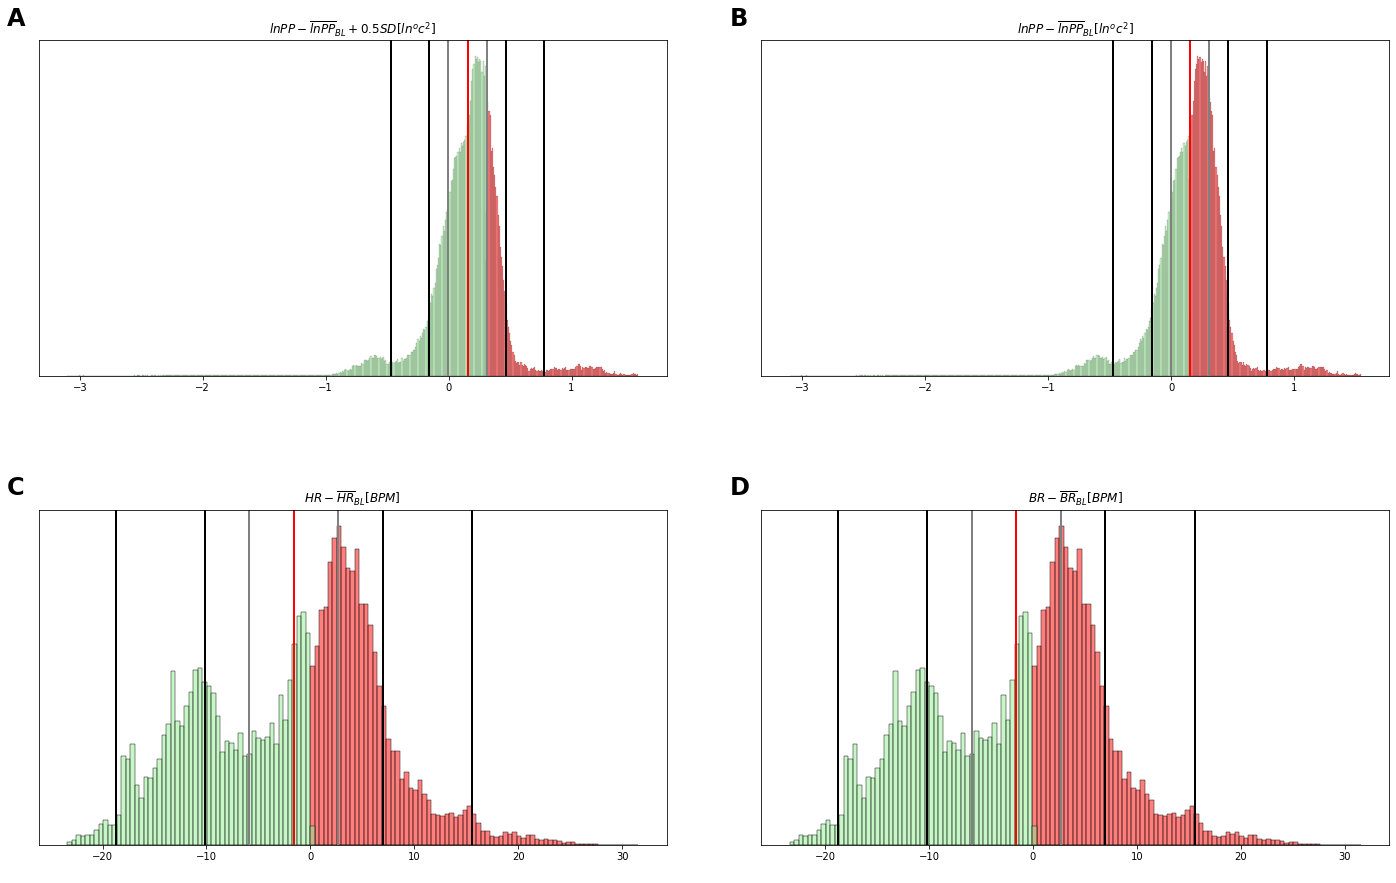

In [28]:
line_width = 2
palette ={'relaxed': 'lightgreen', 'stressed': 'red'}
        

fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C', 'D')):
# for i, label in enumerate(('A', 'B', 'C')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    generate_arousal_extraction_plots(df, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(fig_dir + 'deadline_pp_br_hr_arousal_extraction.pdf', dpi=300, bbox_inches='tight')
plt.show()

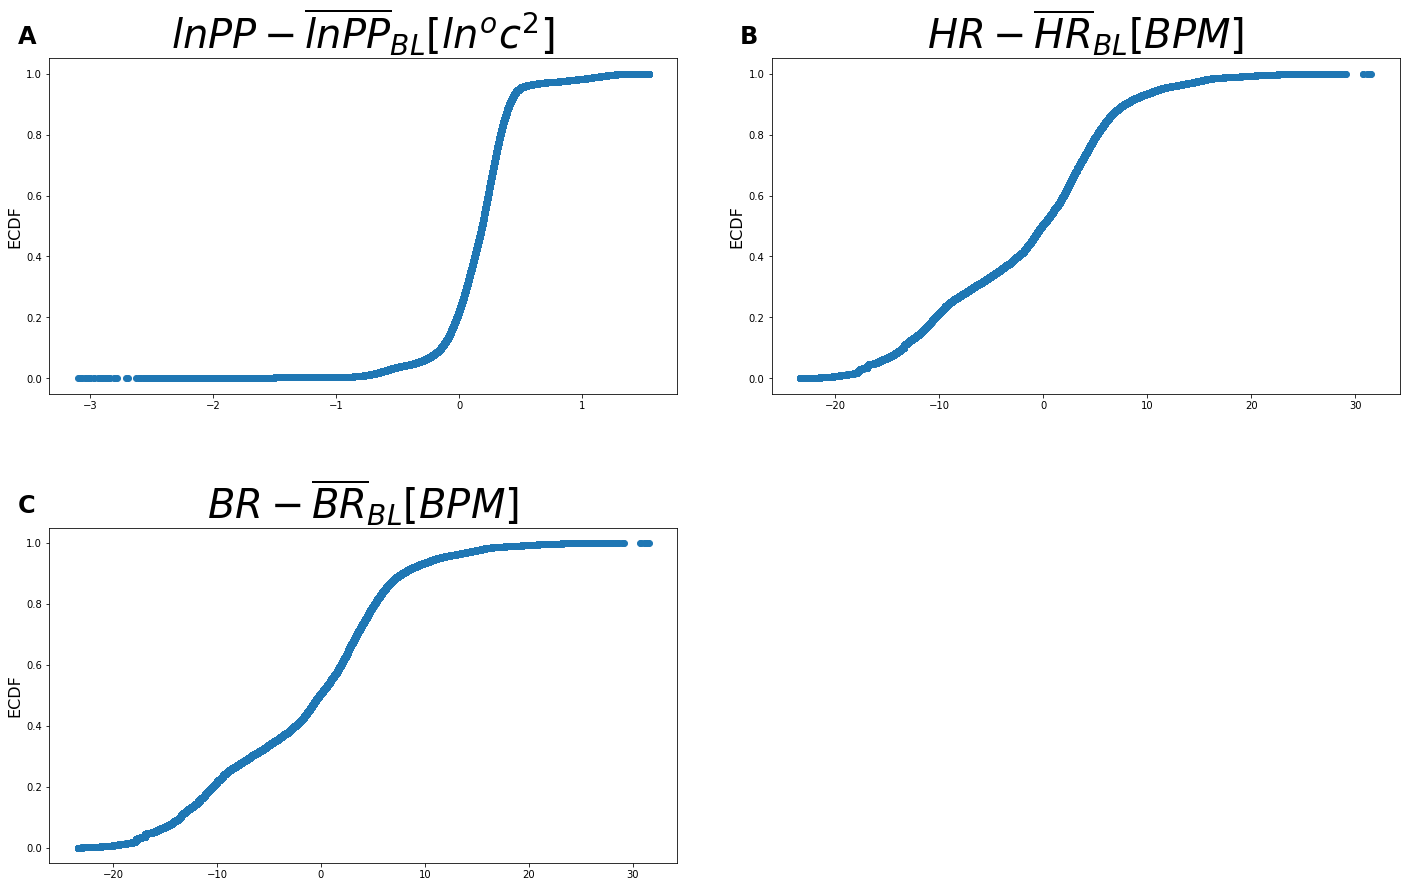

In [29]:
fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

# for i, label in enumerate(('A', 'B')):
for i, label in enumerate(('A', 'B', 'C')):
    ax = fig.add_subplot(2, 2, i+1)
    df = generate_ecdf_plots(df, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(fig_dir + 'deadline_pp_br_hr_ecdf.png', dpi=300, bbox_inches='tight')
fig.savefig(fig_dir + 'deadline_pp_br_hr_ecdf.pdf', dpi=300, bbox_inches='tight')
plt.show()   

In [30]:
# signals = ['PP', 'HR']
signals = ['PP', 'HR', 'BR']

df = generate_ecdf_arousal_cols(df, signals)

In [31]:
df.to_csv(data_dir + 'data_2.5.csv', sep=',')
print(df.Treatment.unique())
print(df.columns)

['Day1_WS' 'Day2_WS' 'Day3_WS' 'Day4_WS']
Index(['Subject', 'Day', 'Treatment', 'TreatmentTime', 'Perinasal',
       'Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance',
       'Effort', 'Frustration', 'NASA Total Sum', 'Gender', 'Age',
       'Heart_ffill', 'Heart_interpolate_poly', 'Heart_interpolate',
       'Perinasal_RB_Log', 'iWatch_HR', 'Heart_RB', 'Breathing_RB',
       'Subject_Txx', 'Breathing', 'TimeElapsed', 'Perinasal_Log', 'Heart',
       'PP_Normalized', 'HR_Normalized', 'BR_Normalized', 'PP_Arousal',
       'PP_Arousal_2', 'HR_Arousal', 'BR_Arousal', 'PP_ecdf', 'HR_ecdf',
       'BR_ecdf', 'PP_HR_ecdf', 'PP_BR_ecdf', 'HR_BR_ecdf', 'PP_HR_BR_ecdf',
       'PP_Arousal_ecdf', 'HR_Arousal_ecdf', 'BR_Arousal_ecdf',
       'PP_HR_Arousal_ecdf', 'PP_BR_Arousal_ecdf', 'HR_BR_Arousal_ecdf',
       'PP_HR_BR_Arousal_ecdf'],
      dtype='object')


-----
# REPLACE WITH THE FUNCTION IN COMMON SCRIPT - WHEN BR IS AVAILABLE - CHECK SIM1 CODE
-----

In [32]:
# def get_deadline_aggregrated_df(df):
#     aggregrated_df = pd.DataFrame()
    
#     print('Subject Processing: ')
#     # for subj in df.Subject.unique():
#     for subj in df.Subject.unique()[:2]:
#         print(subj)
        
#         for treatment in df.Treatment.unique():
#             subj_treatment_df = df.copy()[(df.Subject == subj) & (df.Treatment == treatment )]

#             i = 0
#             totalRows = subj_treatment_df.shape[0]
            
#             while i+2 < totalRows: # proceed for atleast 3 rows
#                 subj_treatment_aggregrated_df = subj_treatment_df.copy().iloc[i: min(totalRows, i+10)]
#                 i += 10
                
#                 subj_treatment_window_first_row = subj_treatment_aggregrated_df.iloc[0]
                
#                 temp_df = pd.DataFrame({'Subject': [subj], 
#                                         # 'Treatment': [treatment], 
#                                         'Treatment': [subj_treatment_window_first_row.Treatment],
#                                         'Gender': [subj_treatment_window_first_row.Gender],
#                                         'Age': [subj_treatment_window_first_row.Age],
#                                         # 'STAI': [subj_treatment_window_first_row.STAI],
#                                         # 'Type_AB': [subj_treatment_window_first_row.Type_AB],
#                                         'Effort': [subj_treatment_window_first_row.Effort],
#                                         'Frustration': [subj_treatment_window_first_row.Frustration],
#                                         'Mental_Demand': [subj_treatment_window_first_row['Mental Demand']],
#                                         'Performance': [subj_treatment_window_first_row['Performance']],
#                                         'Physical_Demand': [subj_treatment_window_first_row['Physical Demand']],
#                                         'Temporal_Demand': [subj_treatment_window_first_row['Temporal Demand']],
#                                         'NASA_Total_Sum': [subj_treatment_window_first_row['NASA Total Sum']]
#                                        })
                
#                 # temp_df['PP_Arousal_Mode'] = subj_drive_window_df.PP_Arousal.mode()
#                 # temp_df['PP_2_Arousal_Mode'] = subj_drive_window_df.PP_Arousal_2.mode()
#                 # temp_df['HR_Arousal_Mode'] = subj_drive_window_df.HR_Arousal.mode()
#                 # temp_df['BR_Arousal_Mode'] = subj_drive_window_df.BR_Arousal.mode()
                
                
#                 temp_df['PP_Arousal_Mode_Hist'] = subj_treatment_aggregrated_df.PP_Arousal.mode()
#                 temp_df['PP_2_Arousal_Mode_Hist'] = subj_treatment_aggregrated_df.PP_Arousal_2.mode()
#                 temp_df['HR_Arousal_Mode_Hist'] = subj_treatment_aggregrated_df.HR_Arousal.mode()
#                 # temp_df['BR_Arousal_Mode_Hist'] = subj_treatment_aggregrated_df.BR_Arousal.mode()
                
#                 temp_df['PP_Arousal_Mode_ecdf'] = subj_treatment_aggregrated_df.PP_Arousal_ecdf.mode()
#                 temp_df['HR_Arousal_Mode_ecdf'] = subj_treatment_aggregrated_df.HR_Arousal_ecdf.mode()
#                 # temp_df['BR_Arousal_Mode_ecdf'] = subj_treatment_aggregrated_df.BR_Arousal_ecdf.mode()

                
#                 temp_df['Perinasal_Mean'] = subj_treatment_aggregrated_df.Perinasal_Log.mean()
#                 temp_df['Perinasal_Median'] = subj_treatment_aggregrated_df.Perinasal_Log.median()
#                 temp_df['Perinasal_SD'] = stdev(subj_treatment_aggregrated_df.Perinasal_Log)
#                 temp_df['Perinasal_SS'] = sum_of_squares(subj_treatment_aggregrated_df.Perinasal_Log)

#                 temp_df['Hr_Mean'] = subj_treatment_aggregrated_df.Heart.mean()
#                 temp_df['Hr_Median'] = subj_treatment_aggregrated_df.Heart.median()
#                 temp_df['Hr_SD'] = stdev(subj_treatment_aggregrated_df.Heart)
#                 temp_df['Hr_SS'] = sum_of_squares(subj_treatment_aggregrated_df.Heart)
                
#                 # temp_df['Br_Mean'] = subj_treatment_aggregrated_df.Breathing.mean()
#                 # temp_df['Br_Median'] = subj_treatment_aggregrated_df.Breathing.median()
#                 # temp_df['Br_SD'] = stdev(subj_treatment_aggregrated_df.Breathing)
#                 # temp_df['Br_SS'] = sum_of_squares(subj_treatment_aggregrated_df.Breathing)
  
#                 aggregrated_df = aggregrated_df.append(temp_df)
                
#     return aggregrated_df



# final_df = get_deadline_aggregrated_df(df)

-----
# REPLACE WITH THE FUNCTION IN COMMON SCRIPT - WHEN BR IS AVAILABLE - CHECK SIM1 CODE
-----

In [33]:
final_df = get_non_overlapping_aggregrated_df(df)

Subject Processing: 
5
7
9
11
13
15
17
19
                 PP_Arousal_Mode
PP_Arousal_Mode                 
arousal                    33.77
neutral                    33.81
non-arousal                32.42 

                 HR_Arousal_Mode
HR_Arousal_Mode                 
arousal                    33.06
neutral                    33.96
non-arousal                32.98 

                 BR_Arousal_Mode
BR_Arousal_Mode                 
arousal                    33.06
neutral                    33.96
non-arousal                32.98 

                    PP_HR_Arousal_Mode
PP_HR_Arousal_Mode                    
arousal                          21.21
neutral                          57.22
non-arousal                      21.58 

                    PP_BR_Arousal_Mode
PP_BR_Arousal_Mode                    
arousal                          21.21
neutral                          57.22
non-arousal                      21.58 

                    HR_BR_Arousal_Mode
HR_BR_Arousal_Mode      

In [34]:
final_df.isnull().sum()

Subject                  0
Treatment                0
Age                      0
Effort                   0
Frustration              0
Mental_Demand            0
Performance              0
Physical_Demand          0
Temporal_Demand          0
NASA_Total_Sum           0
PP_Arousal_Mode          0
HR_Arousal_Mode          0
BR_Arousal_Mode          0
PP_HR_Arousal_Mode       0
PP_BR_Arousal_Mode       0
HR_BR_Arousal_Mode       0
PP_HR_BR_Arousal_Mode    0
PP_Mean                  0
PP_Median                0
PP_SD                    0
PP_SS                    0
Hr_Mean                  0
Hr_Median                0
Hr_SD                    0
Hr_SS                    0
Br_Mean                  0
Br_Median                0
Br_SD                    0
Br_SS                    0
Gender_Female            0
Gender_Male              0
dtype: int64

In [35]:
final_df.to_csv(data_dir + 'data_3.csv', sep=',', index=False)

-----------------------------------------------------
# This part is to get info for paper/report
-----------------------------------------------------

In [36]:
final_df = pd.read_csv(data_dir + 'data_3.csv')
final_df.head()

,Subject,Treatment,Age,Effort,Frustration,Mental_Demand,Performance,Physical_Demand,Temporal_Demand,NASA_Total_Sum,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,PP_Mean,PP_Median,PP_SD,PP_SS,Hr_Mean,Hr_Median,Hr_SD,Hr_SS,Br_Mean,Br_Median,Br_SD,Br_SS,Gender_Female,Gender_Male
0,5,Day1_WS,35.0,15,5,14,12,5,12,63,arousal,non-arousal,non-arousal,neutral,neutral,non-arousal,non-arousal,0.346319,0.361038,0.055406,1.227000,-16.791476,-16.791476,0.001579,2819.536619,-16.791476,-16.791476,0.001579,2819.536619,0,1
1,5,Day1_WS,35.0,15,5,14,12,5,12,63,arousal,non-arousal,non-arousal,neutral,neutral,non-arousal,non-arousal,0.261452,0.268220,0.017390,0.686292,-16.796690,-16.796690,0.001579,2821.287858,-16.796690,-16.796690,0.001579,2821.287858,0,1
2,5,Day1_WS,35.0,15,5,14,12,5,12,63,neutral,non-arousal,non-arousal,neutral,neutral,non-arousal,non-arousal,0.265244,0.265203,0.012130,0.704866,-16.801904,-16.801904,0.001579,2823.039641,-16.801904,-16.801904,0.001579,2823.039641,0,1
3,5,Day1_WS,35.0,15,5,14,12,5,12,63,arousal,non-arousal,non-arousal,neutral,neutral,non-arousal,non-arousal,0.301367,0.306739,0.019182,0.911534,-16.807117,-16.807117,0.001579,2824.791967,-16.807117,-16.807117,0.001579,2824.791967,0,1
4,5,Day1_WS,35.0,15,5,14,12,5,12,63,arousal,non-arousal,non-arousal,neutral,neutral,non-arousal,non-arousal,0.304664,0.296093,0.026836,0.934685,-16.812331,-16.812331,0.001579,2826.544836,-16.812331,-16.812331,0.001579,2826.544836,0,1


In [37]:
# final_df.groupby('Subject')['Gender_Male'].sum()

print('Male: ' + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.ne(0).sum())))
print('Female: ' + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.eq(0).sum())))

Male: 5
Female: 3


In [38]:
print(final_df.Age.min(), final_df.Age.max())

22.0 52.0


In [39]:
print('Total Subjects: ' + str(len(final_df.Subject.unique())))
print('Total Data: ' + str(final_df.shape[0]))

Total Subjects: 8
Total Data: 22356
